In [129]:
import scipy.signal
import librosa
import matplotlib.pyplot as plt
import numpy as np

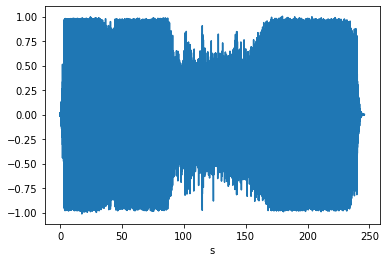

In [151]:
audio, sr = librosa.load("off_grid.mp3", sr=None, mono=True)
t = np.linspace(0, len(audio) / sr, len(audio))
plt.plot(t, audio)
plt.xlabel('s')
plt.show()

In [159]:
# Créer un filtre passe-bas de second ordre avec une fréquence de coupure de 1000 Hz
cutoff = 5
nyquist = sr / 2
low = cutoff / nyquist
order = 5 
b, a = scipy.signal.butter(order, low, btype='low')
# Appliquer le filtre au signal audio
filtered_audio = scipy.signal.lfilter(b, a, audio)

In [160]:
# calculer la transformée de Fourier pour le signal audio original
fft_audio = np.fft.fft(audio)
freq = np.fft.fftfreq(audio.size, d=1/sr)

# calculer la transformée de Fourier pour le signal filtré
fft_filtered_audio = np.fft.fft(filtered_audio)
freq = np.fft.fftfreq(filtered_audio.size, d=1/sr)

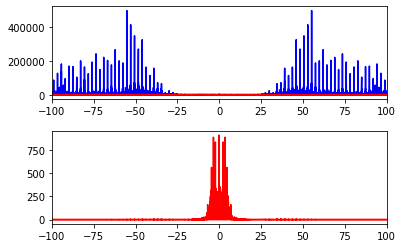

In [161]:
# afficher la transformée de Fourier
plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(fft_audio), 'b')
plt.plot(freq, np.abs(fft_filtered_audio), 'r')
plt.xlim(-100, 100)
# plt.xlim(-100, 22_000)
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_filtered_audio), 'r')
plt.xlim(-100, 100)
# plt.xlim(-100, 22_000)
plt.subplots_adjust(hspace=0.35)
plt.show()

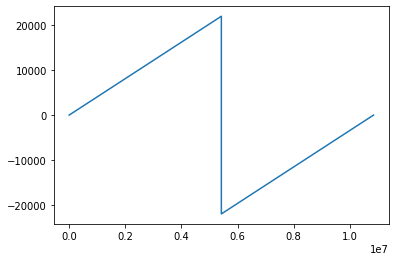

In [166]:
plt.plot(freq)

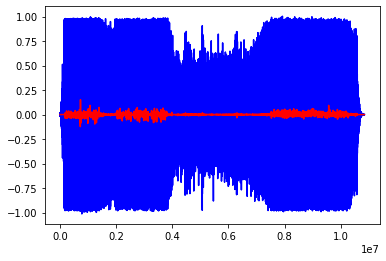

In [162]:
import soundfile as sf

# plt.plot(audio/np.amax(audio), 'b')
# plt.plot(filtered_audio/np.amax(filtered_audio), 'r')

plt.plot(audio, 'b')
plt.plot(20*filtered_audio, 'r')

sf.write('stereo_file.wav', 50*filtered_audio, sr, subtype='PCM_24')

# plt.xlim(0,100)
# plt.title('Audio signal and filtered signal normalized')
# plt.legend()
plt.show()

In [163]:
# Extract BPM
index_bpm_Hz = np.argmax(np.abs(fft_filtered_audio))
if index_bpm_Hz == 0:
    fft_filtered_audio[index_bpm_Hz] = 0
index_bpm_Hz = np.argmax(np.abs(fft_filtered_audio))
print(index_bpm_Hz)
bpm_Hz = freq[index_bpm_Hz]
print(bpm_Hz)
bpm = bpm_Hz * 60
print(bpm)

1
0.004066021118969012
0.24396126713814073


In [164]:
#Nouveaux tests
f, t, Zxx = scipy.signal.stft(audio, sr, nperseg=512)


In [165]:

# plt.pcolormesh(t, f, np.abs(Zxx), cmap='viridis', vmin=0, vmax=None, shading='gouraud')

# plt.title('STFT Magnitude')

# plt.ylabel('Frequency [Hz]')

# plt.xlabel('Time [sec]')

# plt.show()